In [1]:
!pip install easyocr
!pip install imutils

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
    --------------------------------------- 0.1/2.9 MB 3.4 MB/s eta 0:00:01
   -- ------------------------------------- 0.2/2.9 MB 2.4 MB/s eta 0:00:02
   ---- ----------------------------------- 0.4/2.9 MB 2.5 MB/s eta 0:00:02
   ------ --------------------------------- 0.5/2.9 MB 2.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.8/2.9 MB 3.5 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.9 MB 3.7 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.9 MB 4.2 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.9 MB 4.4 MB/s eta 0:00:01
   -------------------------- ------------- 1.9/2.9 MB 4.6 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.9 MB 4.7 MB/s eta 0:00:01
   -------------------------------- ------- 2.3/2.9 MB 4.6 MB/s eta 0:00:01
   ----------------------------------- ---- 2.5/2.9 MB 4.7 MB/s eta 0:00:01
   ----------------

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=12f20865e50ed0189d7bfdf7db318e4c67bb0c7afb96fe1c7b0760ccfbac8b06
  Stored in directory: c:\users\aaryan naithani\appdata\local\pip\cache\wheels\31\d0\2c\87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils


In [26]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import os

In [ ]:
images = []
for filename in os.listdir(images):
    img = cv2.imread(os.path.join(foldername,filename))
    if img is not None:
        images.append(img)

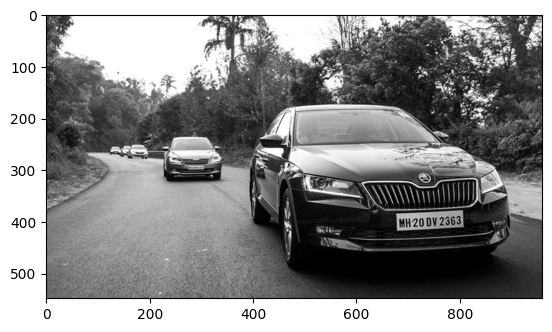

In [30]:
img = cv2.imread('image5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

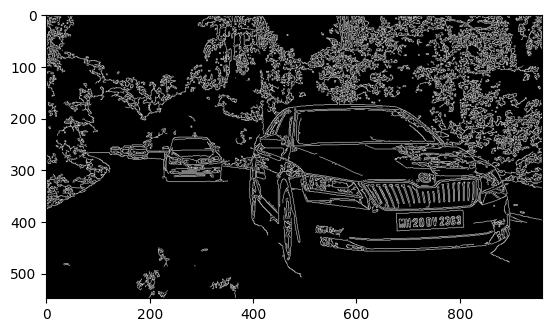

In [11]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [12]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [13]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [14]:
location

array([[[807, 380]],

       [[678, 384]],

       [[679, 418]],

       [[808, 411]]], dtype=int32)

In [15]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

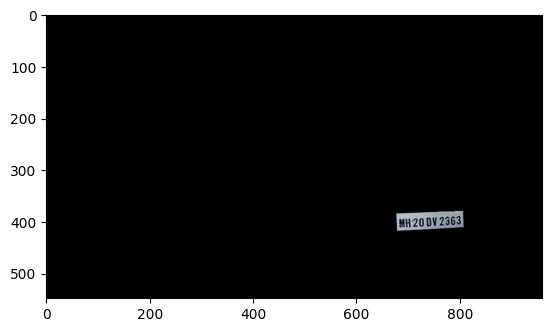

In [16]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [17]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

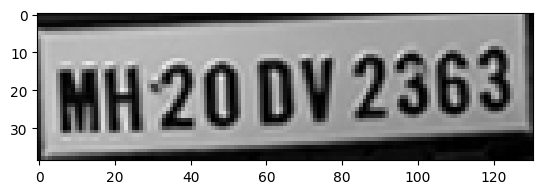

In [19]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [20]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 4], [131, 4], [131, 37], [0, 37]], 'MH20 DV 2363', 0.5435013797485527)]

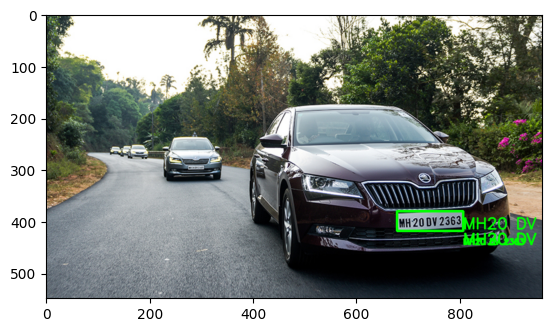

In [25]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))